# Apprentissage supervisé - Multiple Regression Linéaire

Nous avons vu précédemment la régression linéaire simple, via les modèles `LinearRegression` et `HuberRegression`, toutefois si nos tests ont très bien fonctionné, il est rare que nos régressions soient simples dans le monde réel, les problèmes sont plus complexes et donc impliquent plus de variables (features).

Etant donné que nous sommes toujours dans le cas d'une régression nos données doivent toujours être **numériques quantitatives**.

![Image regression](../_images/regression.jpg)
Notre but est toujours de trouver la courbe passant par le plus de points, mais cette fois-ci avec plusieurs features (entrées).

### But du TP
- Découvrir la régression linéaire multiple
- Tester différents modèles de régression linéaire
- Découvrir d'autres façon d'afficher les données avec un nouveau type de graphique

## Regression Linéaire Multiple

Beaucoup plus utilisée donc, la régression linéaire multiple consiste à trouver la droite répondant à l'équation suivante :
$$ y = a_1x_1 + a_2x_2 + … + a_nx_n + b $$
A partir de notre jeu de données qui ressemble à quelque chose comme ceci
![Image regression](../_images/dataframe-linear-multiple.jpg)

Pour les outils, on ne change pas par rapport à la régression linéaire simple, on va donc utiliser :
- numpy
- pandas
- matplotlib.pyplot
- scikit-learn
(voir les précédentes pratiques si vous avez oublié à quoi ils servent)

Quant au dataset, nous allons changer de fichier, mais rester dans le même thème : l'immobilier.

# Avant-propos - Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.

```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Phase 1 : Chargement des données

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

logements_df_src = pd.read_csv("datasets/mlr-prix-logements.csv")
# On garde une copie du dataset
logements_df = logements_df_src.copy()

# Phase 2 : Exploration des données

On essaye de se poser des questions pour mieux connaître notre jeu de données :
- Quelle est la structure de notre dataset ? `df.head()` / `df.tail()`
- Est-ce qu'il y a des données manquantes ? `df.isnull().sum()`
- Est-ce que le format de données est correct ? `df.dtypes`
- Quels sont les données statistiques que nous pouvons sortir de notre dataset ? `df.describe()`
- Que cherchons nous à faire ? Qu'est-ce que nous essayons de trouver ?
- Question subsidiaire : Quelles features influences réellement notre résultat de sortie ?  


### A vous de coder

In [40]:
# Quelle est la structure de notre dataset ? 

# Est-ce qu'il y a des données manquantes ?

# Est-ce que le format de données est correct ?

# Quels sont les données statistiques que nous pouvons sortir de notre dataset ? 

# Question subsidiaire : Quelles features influences réellement notre résultat de sortie ? 

## Corréalation et Causalité

Souvent confondues, la corrélation et la causalité sont deux notions différentes, en statistiques confondre les deux peut conduire à des erreurs. La corrélation détermine la relation entre deux variables qui semblent montrer qu'elles évoluent ensemble (négative : l'une monte, l'autre descend / positive : les deux montent ou descendent en même temps). De ceci on peut potentiellement en déduire une causalité. La causalité désigne une corrélation dans laquelle une variable influence sur l'autre.
Par exemple, si je travaille plus, je gagne plus l'argent. Il y a une corrélation entre mon temps de travail et mon salaire, et une causalité car l'augmentation de mon salaire suit mon temps de travail. 

Ainsi, il peut avoir des corrélations sans causalité, le site de Tyler Vigen liste ce genre de cas.
- [Visiter le site de Tyler Vigen (en anglais)](http://tylervigen.com/page?page=1)

Nous allons donc essayer de trouver les potentielles corrélations (avec causalités) de nos différentes colonnes. Ceci ce calcul grâce à la covariance, cette variable (comprise entre -1 et 1 inclus) désigne le degré de corrélation (positif ou négatif) entre deux variables.
- Covariance proche de -1 : Implique une corrélation négative, les deux variables sont inversement proprotionnelles. Si une augmente, l'autre descend. Elles sont liées.
- Covariance proche de 1 : Implique une corrélation positive, les deux variables sont proportionnelles. Si une augmente, l'autre augmente, la même si ça descend. Elles sont liées.
- Covariance proche de 0 : Implique une corrélation "nulle", les deux variables ne s'influence pas. **Elle ne sont pas liées**

Pour calculer la covariance de nos colonnes, nous allons ~faire les calculs à la main~ utiliser pandas et la méthode de DataFrame `.corr()`.

### A vous de coder

- Affichez la corrélation des colonnes grâce à la méthode `.corr()` sur le DataFrame `logements_df`. N'oubliez pas la fonction `display()` si votre cellule ne termine pas par le calcul de correlations.

In [11]:
logements_df.corr()

,taille_en_pieds_carre,nb_chambres,age_vendeur,prix
taille_en_pieds_carre,1.000000,0.559967,-0.092645,0.854988
nb_chambres,0.559967,1.000000,-0.093251,0.442261
age_vendeur,-0.092645,-0.093251,1.000000,-0.061221
prix,0.854988,0.442261,-0.061221,1.000000


C'est bien, on a un tableau, mais ce n'est pas forcément des plus lisibles, vu que nous savons peu ou prou faire des graphiques, nous allons rendre ceci beaucoup plus lisibles, et le type de graphique le plus adapté est la carte de chaleur (ou heatmap en anglais).

Si nous avons utilisé matplolib jusqu'à présent pour nos graphiques, ce dernier n'est pas très adapté pour certains types de graphiques, matplolib demandant beaucoup trop de configuration. Alors nous allons utiliser seaborn (abrégé en "sns"), présent dans la boite à outils du data-scientifique, nous aurons juste besoin de l'importer via la ligne suivante `import seaborn as sns`.
- [Voir documentation de seaborn pour les heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Text(0.5, 1.0, 'Carte de chaleur des corrélations')

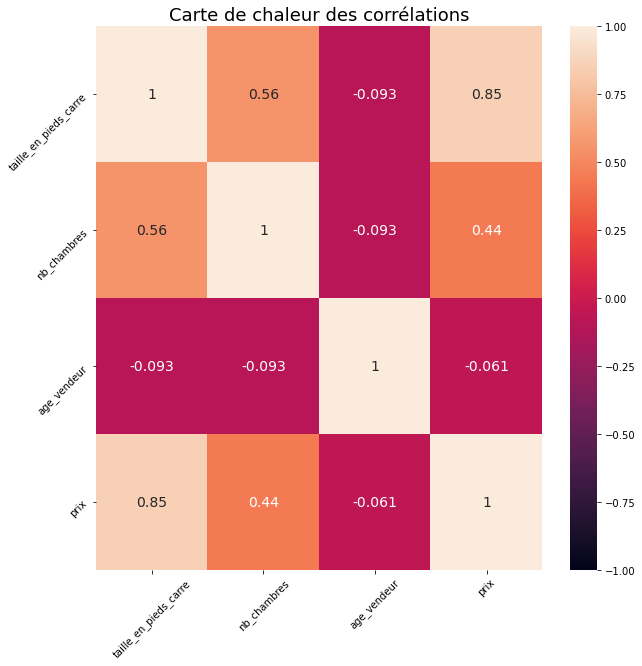

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(
    logements_df.corr(), # Valeur à gérer, ici notre tableau de covariance 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    annot_kws={"fontsize":14}
)
plt.yticks(rotation=45) 
plt.xticks(rotation=45)
plt.title("Carte de chaleur des corrélations", fontdict={'fontsize':18})

##### Que constatez-vous ?

Grâce à nos covariances, nous savons maintenant quelles features nous allons utiliser pour trouver le prix. 
Cette phase de découverte des covariances est très utile, surtout quand le dataset possède beaucoup de features, le calcul des covariances nous permet de savoir quelles features influencent réellement notre valeur de sortie. Ainsi le but de notre TP est de trouver l'équation suivante :

$$ prix = a_1(taille\_en\_pieds\_carre) + a_2(nb\_chambres) + b $$
scikit-learn va nous aider à trouver les valeurs de $a_1-_2$ et $b$. 

Prochain graphique : disposition des données. Dans le TP de régression linéaire nous avons utilisé le nuage de points, toutefois vu que nous avons plus de deux colonnes, le nuage de points ne peut pas fonctionner, nous allons donc utiliser un nuage de points 3D.

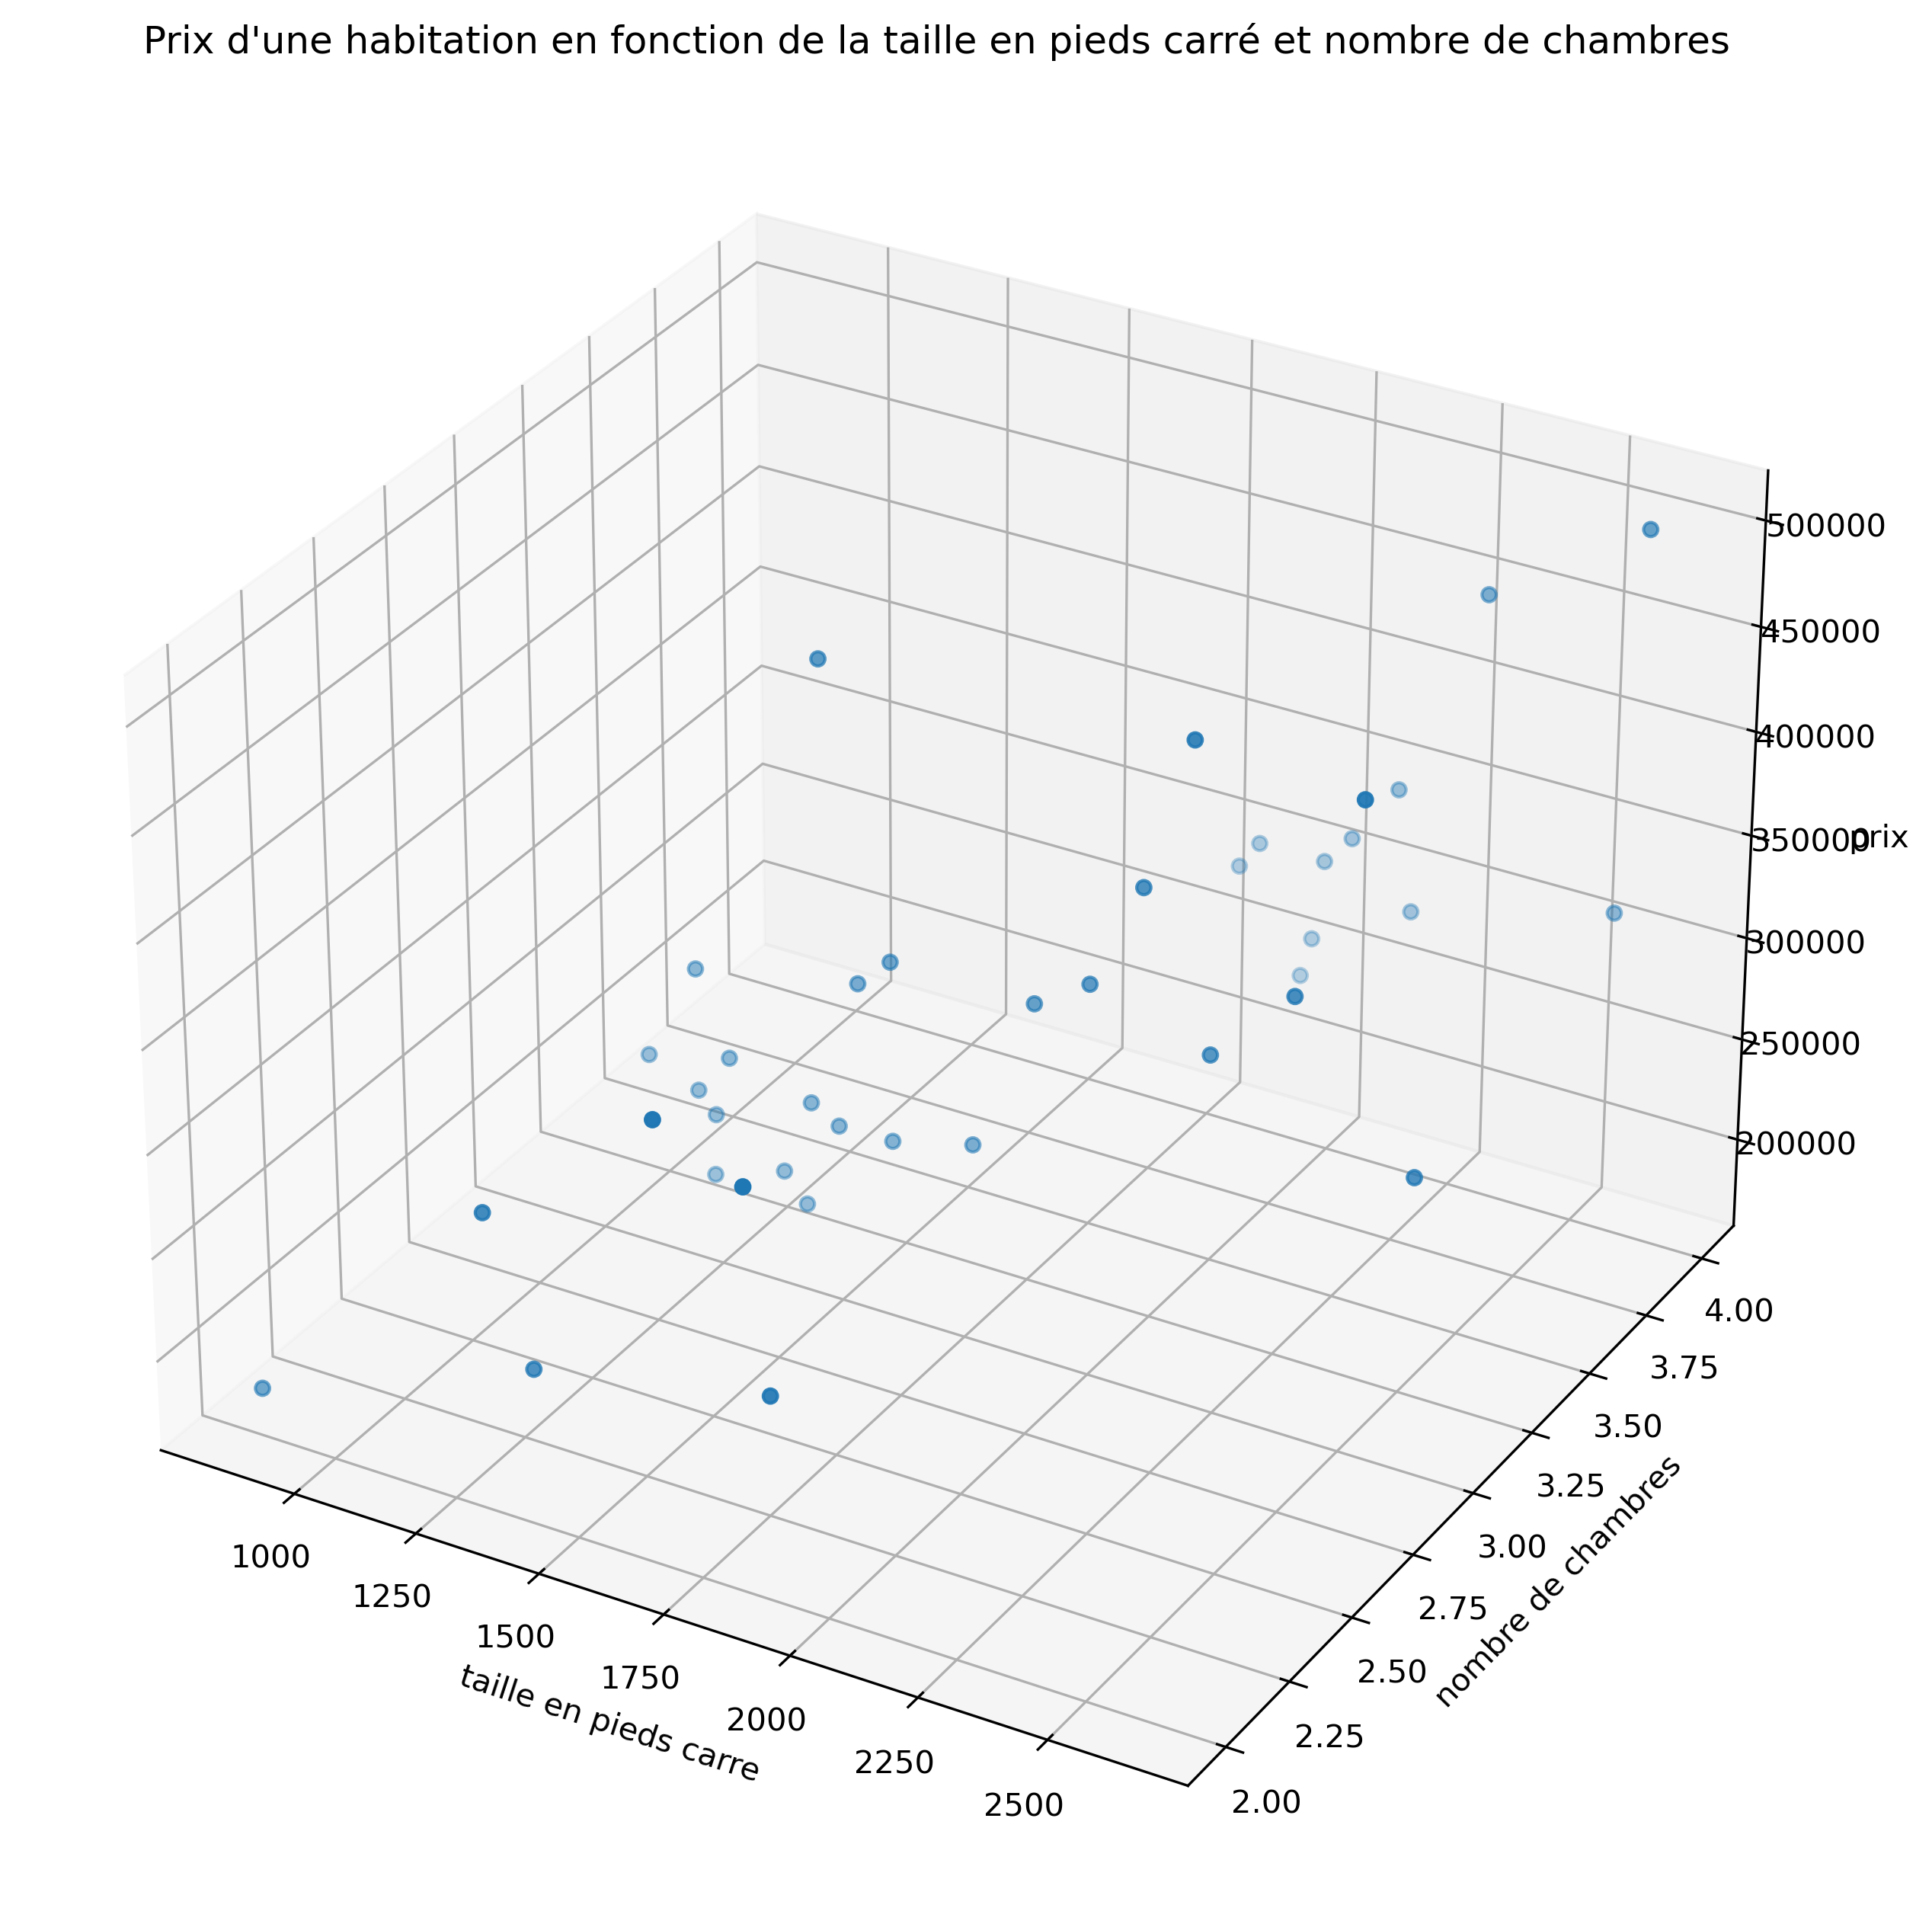

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

plt.title('Prix d\'une habitation en fonction de la taille en pieds carré et nombre de chambres')

ax.set_xlabel('taille en pieds carre')
ax.set_ylabel('nombre de chambres')
ax.set_zlabel('prix', labelpad=15)

ax.scatter(
    logements_df["taille_en_pieds_carre"], # x
    logements_df["nb_chambres"], # y  
    logements_df["prix"], # z
    marker='o', 
    label="données",
)

# Phase 3 : Nettoyage / Formattage

Comme pour le TP précédent, nous allons calculter l'IQR (Interquatile Range / Ecart Interquartile) pour éliminer les valeurs aberrantes.

- Calculez l'IQR pour chaque colonne
- Supprimez les valeurs aberrantes basses et hautes pour chaque feature

# A vous de coder

Calcul de l'IQR
```python
Q1 = df['nom_de_colonne'].quantile(0.25) # Premier quartile
Q3 = df['nom_de_colonne'].quantile(0.75) # Troisième quartile
IQR = Q3 - Q1 # On calcule IQR
```

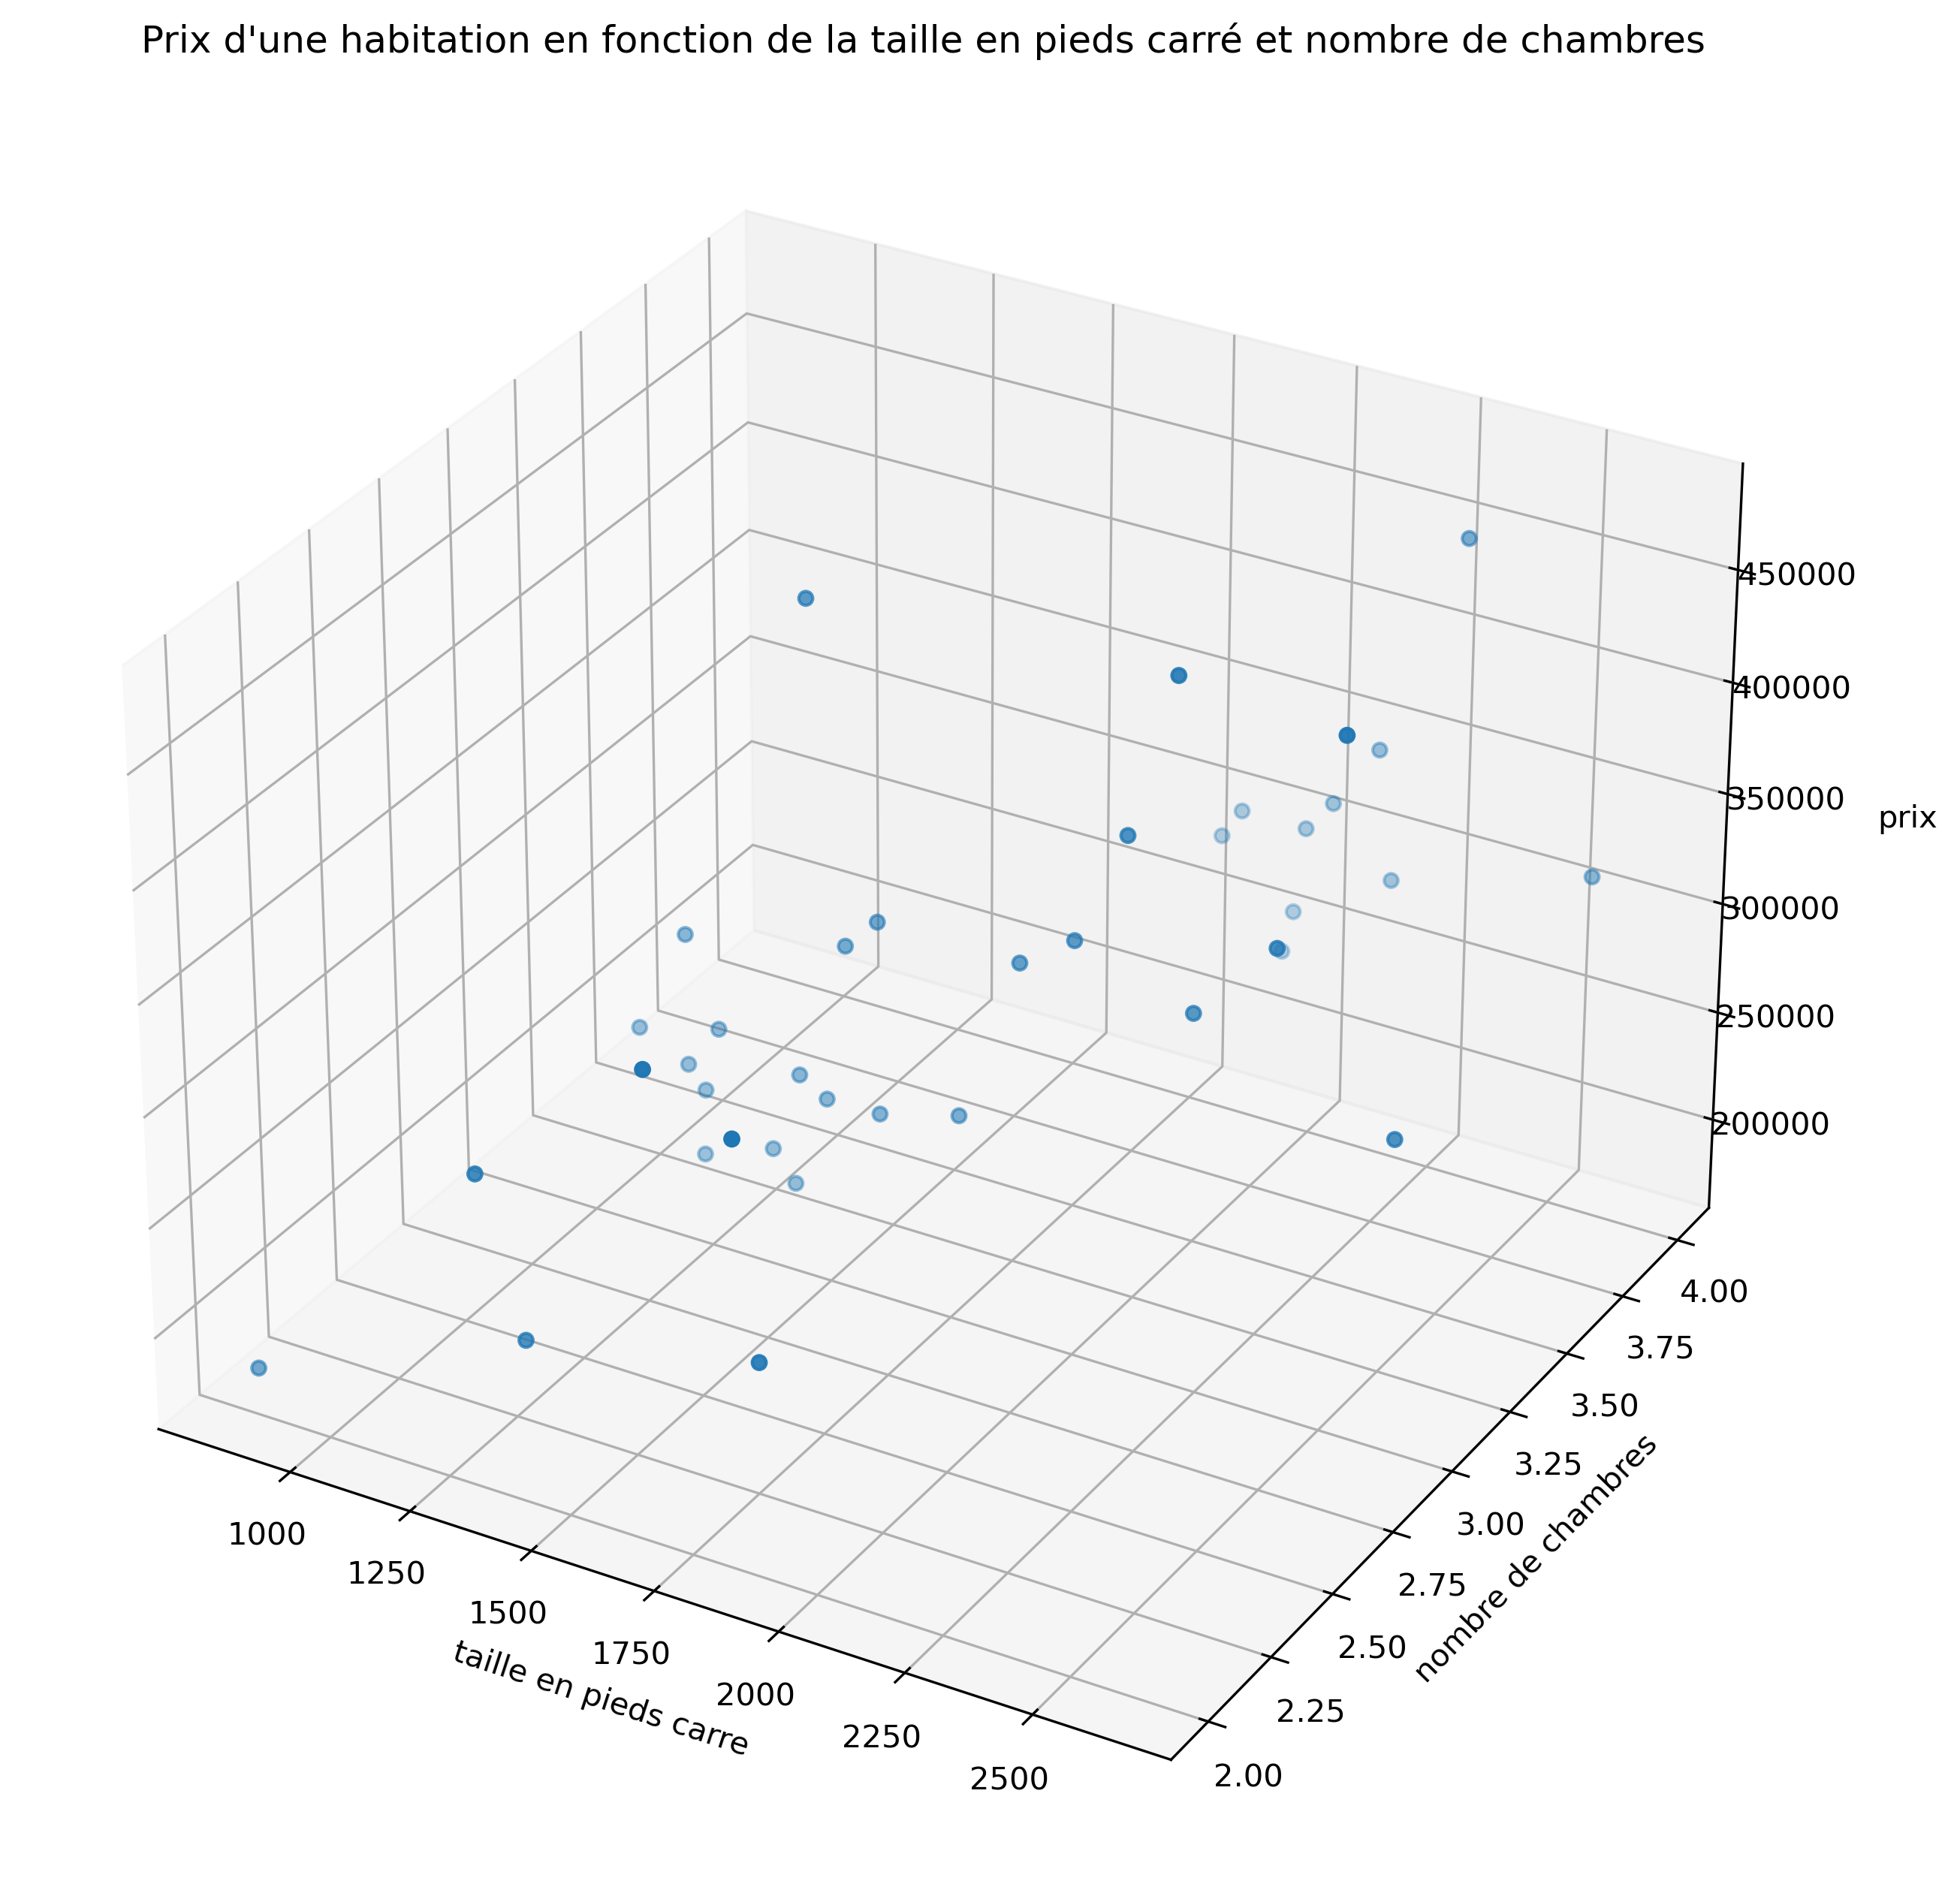

In [34]:
# Calculez l'IQR pour chaque colonne
# Supprimez les valeurs aberrantes basses et hautes pour chaque feature
# Travaillez avec la variable tmp_credit_df

liste_colonnes = ['taille_en_pieds_carre', 'nb_chambres', "prix"]

tmp_logements_df = credit_df.copy()
coeff = 1.5
for col in liste_colonnes:
    Q1 = tmp_credit_df[col].quantile(0.25) # Premier quartile
    Q3 = tmp_credit_df[col].quantile(0.75) # Troisième quartile
    IQR = Q3 - Q1 # On calcule IQR

    tmp_credit_df.query(f'(@Q1 - {coeff} * @IQR) <= `{col}` <= (@Q3 + {coeff} * @IQR)', inplace=True)

logements_df = tmp_logements_df

# Et on réaffiche notre graphique
fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

plt.title('Prix d\'une habitation en fonction de la taille en pieds carré et nombre de chambres')

ax.set_xlabel('taille en pieds carre')
ax.set_ylabel('nombre de chambres')
ax.set_zlabel('prix', labelpad=15)

ax.scatter(
    logements_df["taille_en_pieds_carre"], # x
    logements_df["nb_chambres"], # y  
    logements_df["prix"], # z
    marker='o', 
    label="données",
)

##### Que constatez-vous ?

# Phase 4 : Modélisation

Nous allons utiliser scikit-learn et la régression linéaire via la ligne de code suivante `from sklearn.linear_model import LinearRegression, HuberRegressor`.
Nous allons donc tester deux modèles en même temps, et nous allons également utiliser la fonction `train_test_split` pour valider notre modèle et comparer avec les prédictions.

In [50]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# On cherche à calculer le prix donc on ne garde que ces features, la colonne "age_vendeur" n'ayant aucune influence
liste_feat = logements_df[['taille_en_pieds_carre', 'nb_chambres']] 

sortie = logements_df['prix']

scale = StandardScaler()
X_scaled = scale.fit_transform(liste_feat)

ratio_donnees_test = 0.2
X_entrainement, X_test, y_entrainement, y_test = train_test_split(
    liste_feat, 
    sortie,
    test_size=ratio_donnees_test
)

# LinearRegression
L'utilisation est identique à ce que nous avons fait lors du TP sur la régression linéaire simple

In [51]:
reg_lineaire = LinearRegression()
reg_lineaire.fit(X_entrainement, y_entrainement)

reg_lineaire_pred = reg_lineaire.predict(X_test)

display(f"Les coefficient directeur sont {reg_lineaire.coef_}") # a de ax + b
display(f"L'ordonnée à l'origine est {reg_lineaire.intercept_}") # b de ax +b 

# On stocke le score de notre modèle pour comparer sa performance face à un autre modèle
score_reg_lin = round(reg_lineaire.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_reg_lin}%")

# Contient les prédictions pour nous permettre de comparer les différents modèles
liste_predictions = pd.DataFrame({'Prix cible': y_test, f'Prix est. (linear) - score: {score_reg_lin}%': reg_lineaire_pred})
display(liste_predictions)

'Les coefficient directeur sont [ 64989.90244108 -27498.56075219]'

"L'ordonnée à l'origine est 310964.30714223254"

'Score de notre modèle: 48.19%'

,Prix cible,Predicted (linear) - score: 48.19%
43,299000,232172.369867
11,347000,350930.925913
22,242900,292145.440670
30,349900,370524.108650
35,249900,267354.592096
21,255000,377798.070208
8,212000,258893.044978
29,299900,445492.426164


##### Que constatez-vous ?

In [53]:
reg_huber = HuberRegressor()
reg_huber.fit(X_entrainement, y_entrainement)

display(f"Le coefficient directeur sont {reg_huber.coef_}") # a de ax + b
display(f"L'ordonnée à l'origine est {reg_huber.intercept_}") # b de ax +b 

score_reg_huber = round(reg_huber.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_reg_huber}%")

reg_huber_pred = reg_huber.predict(X_test)

liste_predictions[f'Prix est. (huber) - score: {score_reg_huber}%'] = reg_huber_pred
display(liste_predictions)

'Le coefficient directeur sont [ 50099.21634024 -17740.88533379]'

"L'ordonnée à l'origine est 300772.71664673364"

'Score de notre modèle: 44.43%'

,Prix cible,Predicted (linear) - score: 48.19%,Predicted (huber) - score: 44.43%
43,299000,232172.369867,239473.011061
11,347000,350930.925913,331021.241911
22,242900,292145.440670,285704.867641
30,349900,370524.108650,340657.188855
35,249900,267354.592096,266594.174451
21,255000,377798.070208,346264.517994
8,212000,258893.044978,260071.363003
29,299900,445492.426164,403916.520726


##### Que constatez-vous ?

HuberRegressor, LinearRegression ne semblent fonctionner, leurs scores de prédictions sont trop faibles. Alors essayons-nous à la forêt d'arbres décisionnels, mais cette fois-ci dans sa version régression.

In [54]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_entrainement, y_entrainement)

score_regr = round(regr.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_regr}%")

regr_pred = regr.predict(X_test)

liste_predictions[f'Prix est. (foret regr) - score: {score_regr}%'] = regr_pred

display(liste_predictions)

'Score de notre modèle: 86.04%'

,Prix cible,Predicted (linear) - score: 48.19%,Predicted (huber) - score: 44.43%,Predicted (foret regr) - score: 86.04%
43,299000,232172.369867,239473.011061,227469.98
11,347000,350930.925913,331021.241911,327360.71
22,242900,292145.440670,285704.867641,324082.00
30,349900,370524.108650,340657.188855,332917.80
35,249900,267354.592096,266594.174451,219834.30
21,255000,377798.070208,346264.517994,340699.68
8,212000,258893.044978,260071.363003,227035.53
29,299900,445492.426164,403916.520726,379464.00


##### Que constatez-vous ?

NameError: name 'clf' is not defined